<a href="https://colab.research.google.com/github/Anushka23ja/MSIS502/blob/main/Individual_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question #1


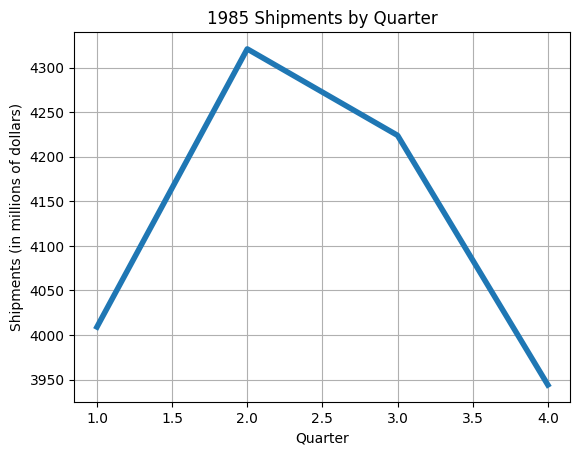

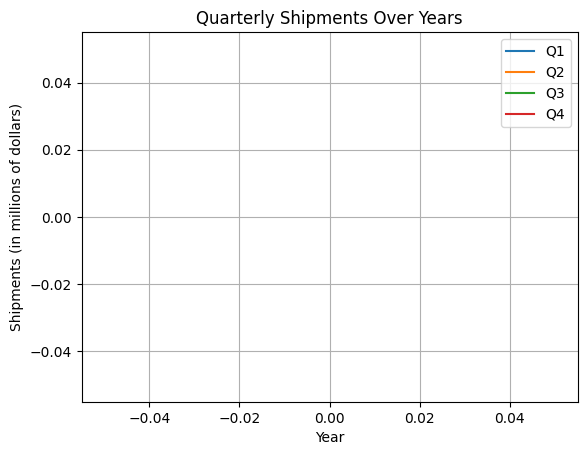

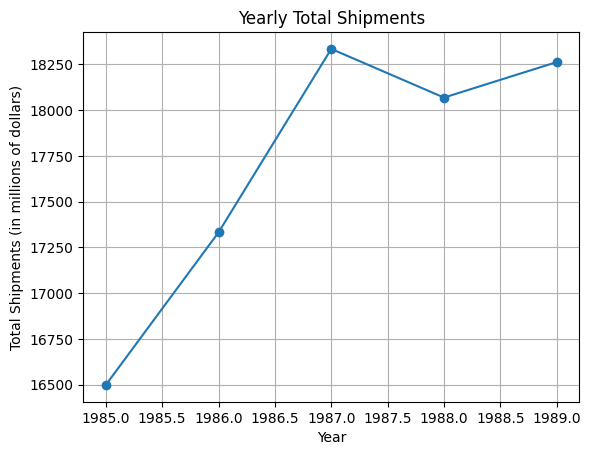

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv('ApplianceShipments.csv')
df.columns = ['Year', 'Quarter', 'Shipments']

# Question 1: Line plot for 1985 by quarter
df1985 = df[df['Year'] == 1985]
plt.figure()
plt.plot(df1985['Quarter'], df1985['Shipments'], linewidth=4)
plt.xlabel('Quarter')
plt.ylabel('Shipments (in millions of dollars)')
plt.title('1985 Shipments by Quarter')
plt.grid(True)
plt.show()

# Question 2: Line plots for Q1–Q4 across years
plt.figure()
for quarter in ['Q1', 'Q2', 'Q3', 'Q4']:
    df_q = df[df['Quarter'] == quarter]
    plt.plot(df_q['Year'], df_q['Shipments'], label=quarter)

plt.xlabel('Year')
plt.ylabel('Shipments (in millions of dollars)')
plt.title('Quarterly Shipments Over Years')
plt.legend()
plt.grid(True)
plt.show()

# Question 3: Total shipments per year
yearly = df.groupby('Year')['Shipments'].sum().reset_index()
plt.figure()
plt.plot(yearly['Year'], yearly['Shipments'], marker='o')
plt.xlabel('Year')
plt.ylabel('Total Shipments (in millions of dollars)')
plt.title('Yearly Total Shipments')
plt.grid(True)
plt.show()


Question #2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('AB_NYC_2019.csv')

# Question 1:

# 1.
brooklynListings = df[df['neighbourhood_group'] == 'Brooklyn']
numBrooklyn = len(brooklynListings)
print("Q1. Num of Brooklyn listings:", numBrooklyn)

# 2.
avgReviewsBrooklyn = brooklynListings['number_of_reviews'].mean()
print("Q2. Average reviews in Brooklyn:", avgReviewsBrooklyn)

# 3.
longStayListings = df[df['minimum_nights'] > 30]
numLongStays = len(longStayListings)
print("Q3. Listings requiring stays > 30 nights:", numLongStays)

# 4.
avgPriceByBorough = df[df['neighbourhood_group'].isin(['Manhattan', 'Brooklyn', 'Queens'])] \
                    .groupby('neighbourhood_group')['price'].mean()
print("Q4. Average price by borough:\n", avgPriceByBorough)


Q1. Num of Brooklyn listings: 4094
Q2. Average reviews in Brooklyn: 24.077186126038104
Q3. Listings requiring stays > 30 nights: 129
Q4. Average price by borough:
 neighbourhood_group
Brooklyn     115.482413
Manhattan    175.978547
Queens        94.808970
Name: price, dtype: float64


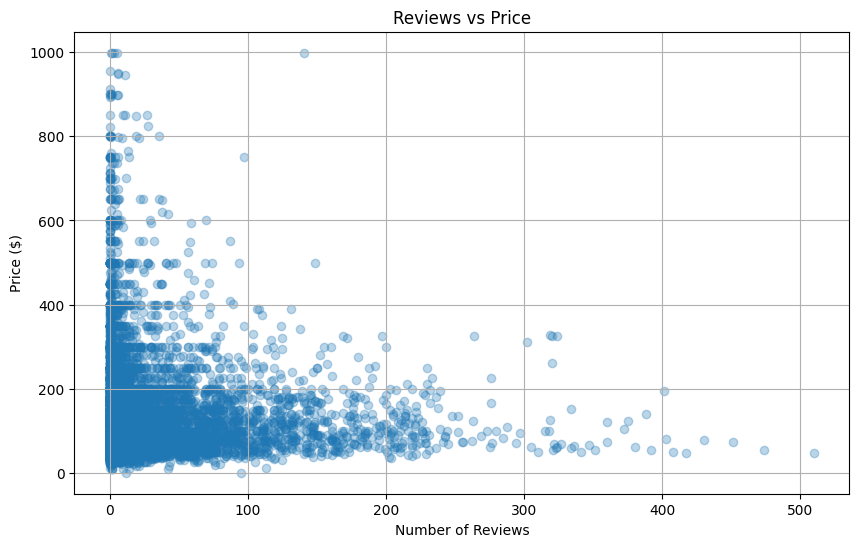

In [ ]:
#Question 2:
dfFiltered = df[df['price'] < 1000]

plt.figure(figsize=(10, 6))
plt.scatter(dfFiltered['number_of_reviews'], dfFiltered['price'], alpha=0.3)
plt.xlabel('Number of Reviews')
plt.ylabel('Price ($)')
plt.title('Reviews vs Price')
plt.grid(True)
plt.show()

**Insights:**  

**What patterns do you see?**  
I noticed that Airbnb listings with lower and more affordable prices tend to receive more reviews compared to the more expensive ones in NYC. For example, listings priced under \$200 often have around 100 reviews. There are also some clear outliers, with certain listings around \$100 having over 500 reviews, which suggests they are very popular or frequently booked.

**Are expensive listings reviewed more or less? Why might that be?**  
Expensive listings are generally reviewed less. This could be because average-cost listings are more practical and accessible for most people living in or visiting NYC. Since they’re more affordable, they likely get booked more often, which increases the chance of getting reviewed. Also, guests might feel more compelled to leave a review when they have a strong experience, whether good or bad. With affordable listings being used more frequently, there's naturally a higher chance of people sharing feedback.


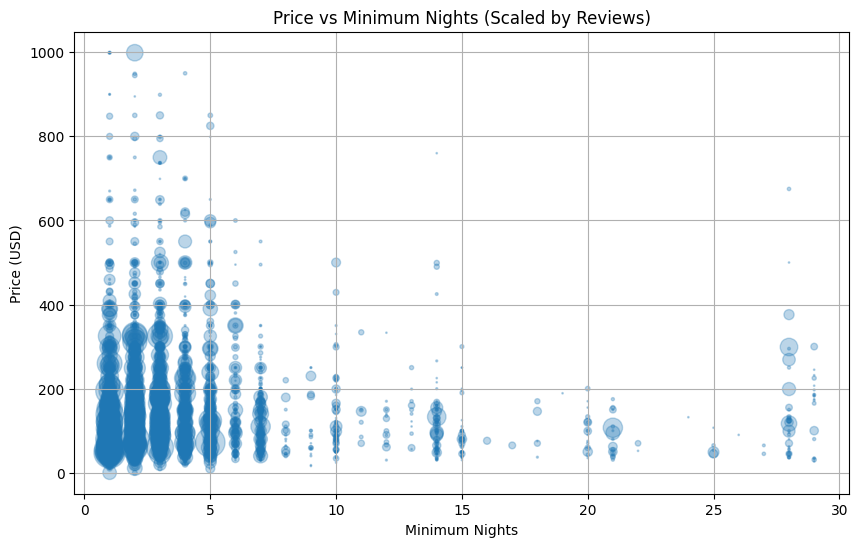

In [ ]:
#Question 3:
dfShortStays = df[df['minimum_nights'] < 30]
dfShortStays = dfShortStays[dfShortStays['price'] < 1000]

plt.figure(figsize=(10, 6))
plt.scatter(dfShortStays['minimum_nights'], dfShortStays['price'],
            s=dfShortStays['number_of_reviews'], alpha=0.3)
plt.xlabel('Minimum Nights')
plt.ylabel('Price (USD)')
plt.title('Price vs Minimum Nights (Scaled by Reviews)')
plt.grid(True)
plt.show()


**Insights**

**What patterns do you observe from this figure and what business
insights can be derived from these patterns?**
From the figure it is clear that listings with lower minimum night requirements, especially between 1 to 5 nights, are more in demand, particularly when priced around 100 dollars or less. These listings have a noticeably higher concentration of reviews which suggests they attract more guests. There are a few outliers such as stays of around 14 nights priced under 200 dollars but those are less frequent. Overall it seems the business model focuses on short-term, budget-friendly stays targeting travelers who stay in NYC briefly and are price-conscious. This implies that hosts aiming to maximize bookings and visibility should consider keeping both minimum night requirements and prices low, ideally under 200 dollars, to align with guest demand.

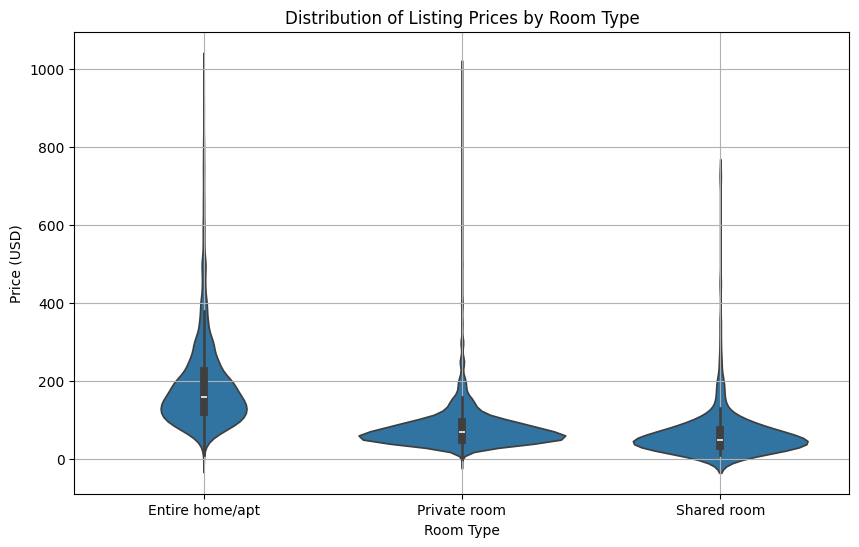

In [ ]:
#Question 4:

import seaborn as sns
import matplotlib.pyplot as plt

filteredData = df[df['price'] < 1000]
plt.figure(figsize=(10, 6))
sns.violinplot(data=filteredData, x='room_type', y='price')
plt.title('Distribution of Listing Prices by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

**Insights:**

**Are there any interesting patterns in the spread or concentration of prices? For example, which room type has the highest median price?**  
What I noticed from the violin plot is that private rooms are more common compared to shared rooms, which tend to have a lower median price. The entire home/apt category has the highest median price. Private rooms seem to be in demand because they strike a balance between cost and privacy, while entire homes are less common and have a narrower distribution, meaning they are booked less frequently.

**Which room type has the widest range of prices?**  
Entire homes have the widest range of prices, spanning from very cheap options all the way up to listings over $1000 per night.

**Any additional conclusions you can make from this plot?**  
To sum it up, shared rooms are the cheapest and most affordable option with a smaller price range. Private rooms have a moderate price range and popularity, while entire homes/apt have the highest prices and the widest price range, reflecting a variety of options from budget to luxury.


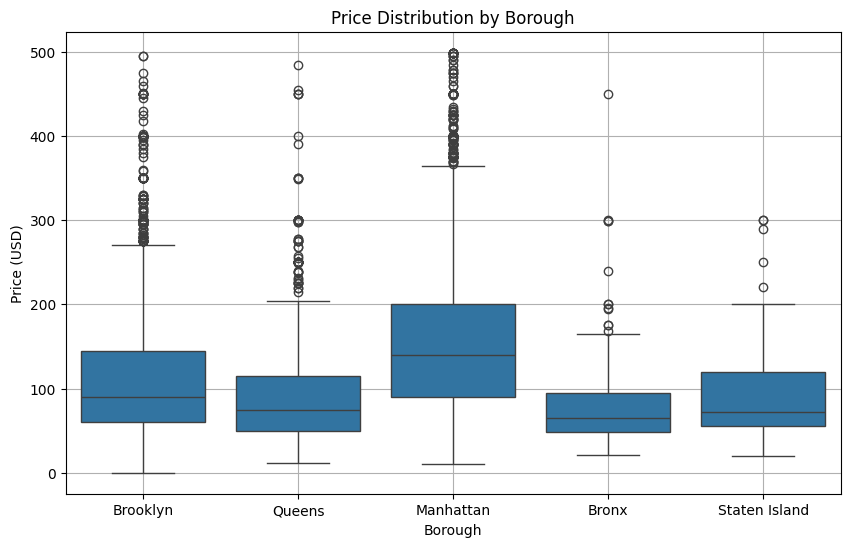

In [ ]:
#Question 5:

#Boxplot (Used ChatGPT)
filteredData = df[df['price'] < 500]

plt.figure(figsize=(10, 6))
sns.boxplot(data=filteredData, x='neighbourhood_group', y='price')
plt.title('Price Distribution by Borough')
plt.xlabel('Borough')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


**Insights**

**Write a short comment (2–3 sentences) explaining what you see and why it’s
interesting from a business or user perspective.**

From the boxplot, it’s clear that pricing varies a lot depending on the borough. Manhattan has the highest overall prices, with many listings leaning toward the upper range, which makes sense given the area’s reputation and demand. Brooklyn, while it has more listings overall as seen in the histogram, seems to offer more affordable price points. This shows that even if a borough has more listings, it doesn’t always mean the prices are higher. Pricing depends more on the area’s market value, audience, and the type of stay being offered.

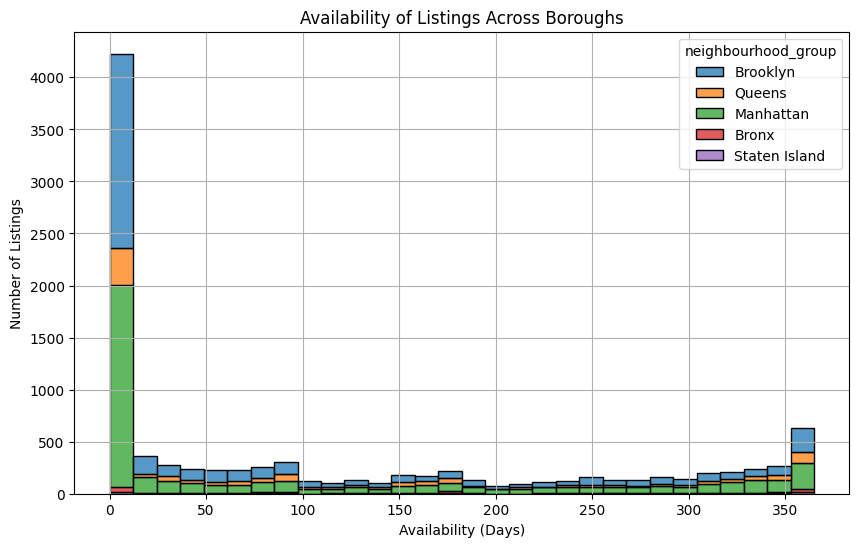

In [ ]:
# Histogram of availability (how many days listings are available)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='availability_365', hue='neighbourhood_group', bins=30, kde=False, multiple='stack')
plt.title('Availability of Listings Across Boroughs')
plt.xlabel('Availability (Days)')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.show()

**Insights**

**Write a short comment (2–3 sentences) explaining what you see and why it’s
interesting from a business or user perspective.**

From the histogram, it’s clear that there are noticeable differences in the number of Airbnb listings across boroughs. Brooklyn consistently has more listings, which could be because it’s popular with tourists or has neighborhoods that attract more hosts. On the other hand, Manhattan shows fewer listings overall, possibly due to stricter housing regulations, limited space, or higher competition. This pattern shows how location, tourism, and local policies can impact where hosts choose to list as areas that are more flexible or in demand naturally see more activity.

Question 6:

**Write up reflections on how AI tools assisted you in completing this assignment. Mention specific
questions you asked and how the responses helped you.**

During this assignment, I used AI to help guide me through the process by first asking for rough outlines of code. This gave me a starting point and helped me understand the overall structure, which pushed me to dive deeper into the content and learn how things worked. As I went along, I started recognizing common Python patterns and began challenging myself to write some lines of code on my own without help. For the insight sections, I used ChatGPT to help polish my wording so my thoughts could be communicated more clearly and accurately, making sure they reflected my understanding and thought process.